In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

## step one: data

### creating data 1.1: generating values with numpy

In [13]:
# create a large dataset: one million points

x_lin = np.linspace(0,10,1000000)

# create some noise
# pass in the number of points needed: same as x_lin

noise = np.random.rand(len(x_lin))

# check to see: these are just a million data points each
# linear distribution for x_lin
# random numbers from noise

print(x_lin, '\n', 'shape: ', x_lin.shape)
print('\n')
print(noise, '\n', 'shape: ', noise.shape)

[0.000000e+00 1.000001e-05 2.000002e-05 ... 9.999980e+00 9.999990e+00
 1.000000e+01] 
 shape:  (1000000,)


[0.1050464  0.8836699  0.01693174 ... 0.6580234  0.71009733 0.39138382] 
 shape:  (1000000,)


### creating data 1.2: dataframes using pandas

remember, we're modeling a line with the shape 

y = mx + b

let's set 

b = 5

and

m = 0.5

now generate this line (and add in the noise we created earlier):

In [50]:
# b from y = mx + b

intercept = 5

# m from y = mx + b

slope = 0.5

# y = mx + b (and a little noise)

y_actual = slope * x_lin + intercept + noise

creating dataframes using pandas:

In [51]:
# create a dataframe for X

X_data = pd.DataFrame(data=x_lin, columns=['X_data'])

X_data.head()

,X_data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [52]:
# create a dataframe for y

y_data = pd.DataFrame(data=y_actual, columns=['y'])

y_data.head()

,y
0,5.105046
1,5.883675
2,5.016942
3,5.146700
4,5.732145


merge (concatenate) the 2 dataframes together using pandas .concat() method:

In [53]:
# pass in dataframes to merge as a list
# add an axis to merge along columns vs rows
# axis=1 merges along columns

df = pd.concat([X_data, y_data], axis=1)

df.head()

,X_data,y
0,0.00000,5.105046
1,0.00001,5.883675
2,0.00002,5.016942
3,0.00003,5.146700
4,0.00004,5.732145


### visualizing the data

with 1 million data points, it would be difficult (if not impossible) to plot here in jupyter notebook (without crashing the kernel). using pandas, we can take a sample of any size we specify and plot that:

In [54]:
# grab a sample
# this one has 500 points

df_sample = df.sample(n=250)

df_sample.head()

,X_data,y
821795,8.217958,9.200826
922087,9.220879,9.888620
938891,9.388919,9.860309
680318,6.803187,9.014985
6772,0.067720,5.358423


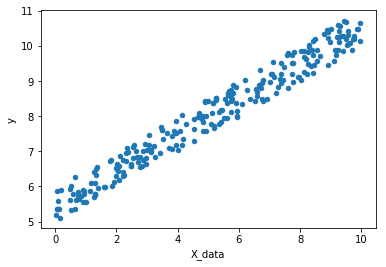

In [55]:
# now plot from the sample
# note: scatterplots require args for x and y

df_sample.plot(kind='scatter', x='X_data', y='y')

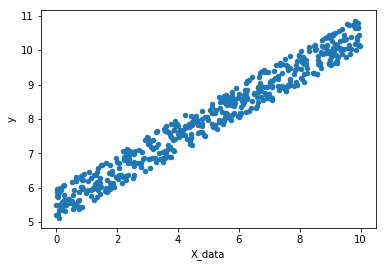

In [56]:
# this can all be done in 1 line, too
# here's a sample plot with 500 points

df.sample(n=500).plot(kind='scatter', x='X_data', y='y')

the plot with 500 sample points is a little more dense than the plot with 250.

we can also see there is definitely a linear fit (albeit with a little noise), a positive (upward) slope, and that the intercept is around 5, as we set before adding in the noise.

## step two: creating a model

#### overview of the process:
#### 1) create variables
#### 2) create placeholders
#### 3) build the graph


### a note on batch size

a million data points is too many to pass in all at once! complex models work best when they have a lot of data. the solution: feeding data in in batches.

what size should batches be? that depends on the data. smaller datasets don't really need batches; training a model on a large dataset with tiny batches could take a while. for this model, i'll be using a batch size of 50.

In [46]:
training_batch_size = 50

### setting up variables

remember: y = mx + b

setting up variables for the slope (m) & intercept (b) in our model:

In [47]:
# initialize with random numbers

m = tf.Variable(np.random.randn())

b = tf.Variable(np.random.randn())

### placeholders for data feeds

creating placeholders for the data to feed into the model. note: we need placeholders for both X and y, and the size will be the same as a training_batch_size:

In [49]:
# placeholder size is the same as the training batch

X_datafeed = tf.placeholder(tf.float32,[training_batch_size])

y_datafeed = tf.placeholder(tf.float32,[training_batch_size])

### building the model

In [57]:
# y = mx + b yet again
# this time we're directly feeding the data into the model

model = m * X_datafeed + b